# Lab 1

------------------------------------------------------------------------------
Author: Kevin Paganini    
Date: 12.5.2022      
Description: In this lab we are doing data analysis on a sacramento real estate dataset.    
Most of the content in this notebook is about data cleaning as well as data visualization.    

In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_rows', 250)


# makes plots nice
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
    return ax


sacramento_real_estate_path = os.path.join('Data','Sacramentorealestatetransactions.csv')

## 1. Loading the Data and Initial Assessment

A. Load the Sacramento dataset as a dataframe

In [92]:
sacramento_df = pd.read_csv(sacramento_real_estate_path)

B. Head and info of df

In [93]:
print(f'{sacramento_df.shape[0]} rows, {sacramento_df.shape[1]} columns')
sacramento_df.head(10)

985 rows, 12 columns


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [94]:
sacramento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### Insights for B

There are no Null values. We have 5 string (object) columns, 5 integer columns and 2 floating point columns.    
The data includes records of houses with their address (street address as well as lat and lon) and features of the house   
(e.g. number of baths, square_feet, price).    
It looks as if price is the dependent variable where all other columns are the independent variables. 


## 2. Representing categorical variables

a. Sometimes a variable can either be represented as an integer or categorical variable.  
Count the number of unique values for the streets, zip codes, and beds. 

In [95]:
cols = sacramento_df.columns

for val in cols:
    print(f'Number of unique values for {val}: {len(sacramento_df[val].unique())}')


Number of unique values for street: 981
Number of unique values for city: 39
Number of unique values for zip: 68
Number of unique values for state: 1
Number of unique values for beds: 8
Number of unique values for baths: 6
Number of unique values for sq__ft: 603
Number of unique values for type: 4
Number of unique values for sale_date: 5
Number of unique values for price: 605
Number of unique values for latitude: 969
Number of unique values for longitude: 967


2a. There are 981 unique street values, 68 unique zip code values and 8 unique bed values. 

b. Convert the following variables to categorical variables: city, state, zip, beds, baths, 
type

In [96]:
sacramento_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [97]:
sacramento_df['city'] = sacramento_df['city'].astype("category")
sacramento_df['state'] = sacramento_df['state'].astype("category")
sacramento_df['zip'] = sacramento_df['zip'].astype("category")
sacramento_df['beds'] = sacramento_df['beds'].astype("category")
sacramento_df['baths'] = sacramento_df['baths'].astype("category")
sacramento_df['type'] = sacramento_df['type'].astype("category")
sacramento_df.info()
# city_map

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    category
 2   zip        985 non-null    category
 3   state      985 non-null    category
 4   beds       985 non-null    category
 5   baths      985 non-null    category
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    category
 8   sale_date  985 non-null    object  
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 56.9+ KB


Ordinal encoding was not needed for this lab actually.

### Question from 2

Do you think it is more appropriate to represent these three variables as 
categorical or integer variables?  Why or why not? (street, zip code and bed)

- I think the street column can become an integer variable as it has many unique values. There would be way to many categories.   
- Zip code does not have as many unique values. Therefore it can be used as a categorical variable. You could assign each zip code its unique category or group zip codes together into more general categories.   
- Bed can also be used a a catgorical variable. It does not need to be grouped together like zip code as there are already so little unique values. Bed as an int also makes sense, because we are counting something. The categories mimic exactly what the count is.

## 3. Cleaning Continuous Variables 
 
a. Plot histograms of the square footage, latitudes, and longitudes.   
 


Min of sq__ft: 0
Max of sq__ft: 5822
Min of latitude: 38.241514
Max of latitude: 39.020808
Min of longitude: -121.551704
Max of longitude: -120.597599


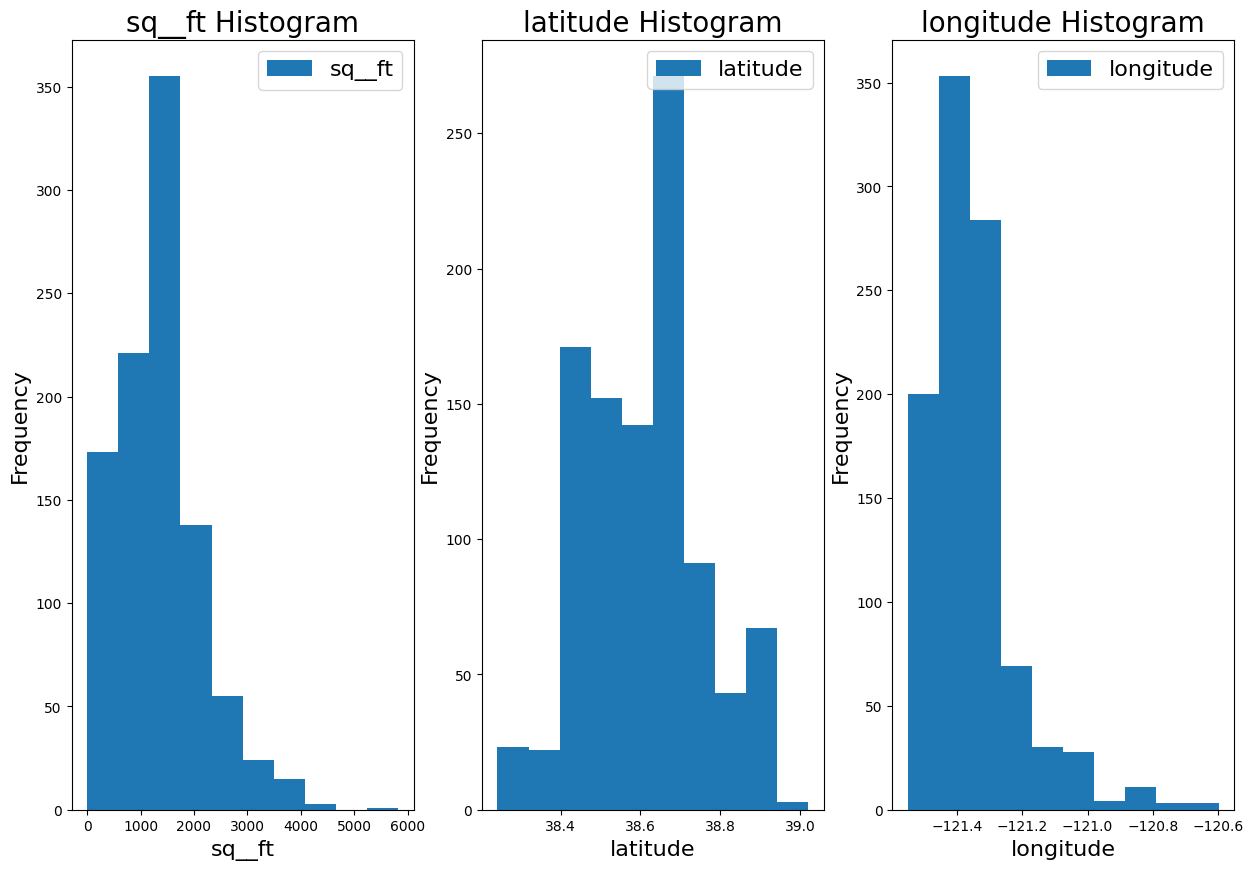

In [98]:
def make_hist(ax, col, df):
    print(f'Min of {col}: {df[col].min()}')
    print(f'Max of {col}: {df[col].max()}')
    ax = df[col].plot(kind='hist', ax=ax)
    make_pretty(ax, f'{col} Histogram', col, 'Frequency')


fig, ax = plt.subplots(figsize=(15, 10), ncols=3)


make_hist(ax[0], 'sq__ft', sacramento_df)
make_hist(ax[1], 'latitude', sacramento_df)
make_hist(ax[2], 'longitude', sacramento_df)


### Questions
Do you notice any “odd” patterns in any of the plots? Do you think they real or 
artifacts?

All three columns follow some what of a normal distribution. It makes sense that most houses would have these traits in common.



## 4.Exploring Categorical Variables 
 
a. Plot the beds, baths, type, state, city, and zip codes as count (bar) plots. 
 

<AxesSubplot: title={'center': 'type'}, xlabel='type labels', ylabel='type value counts'>

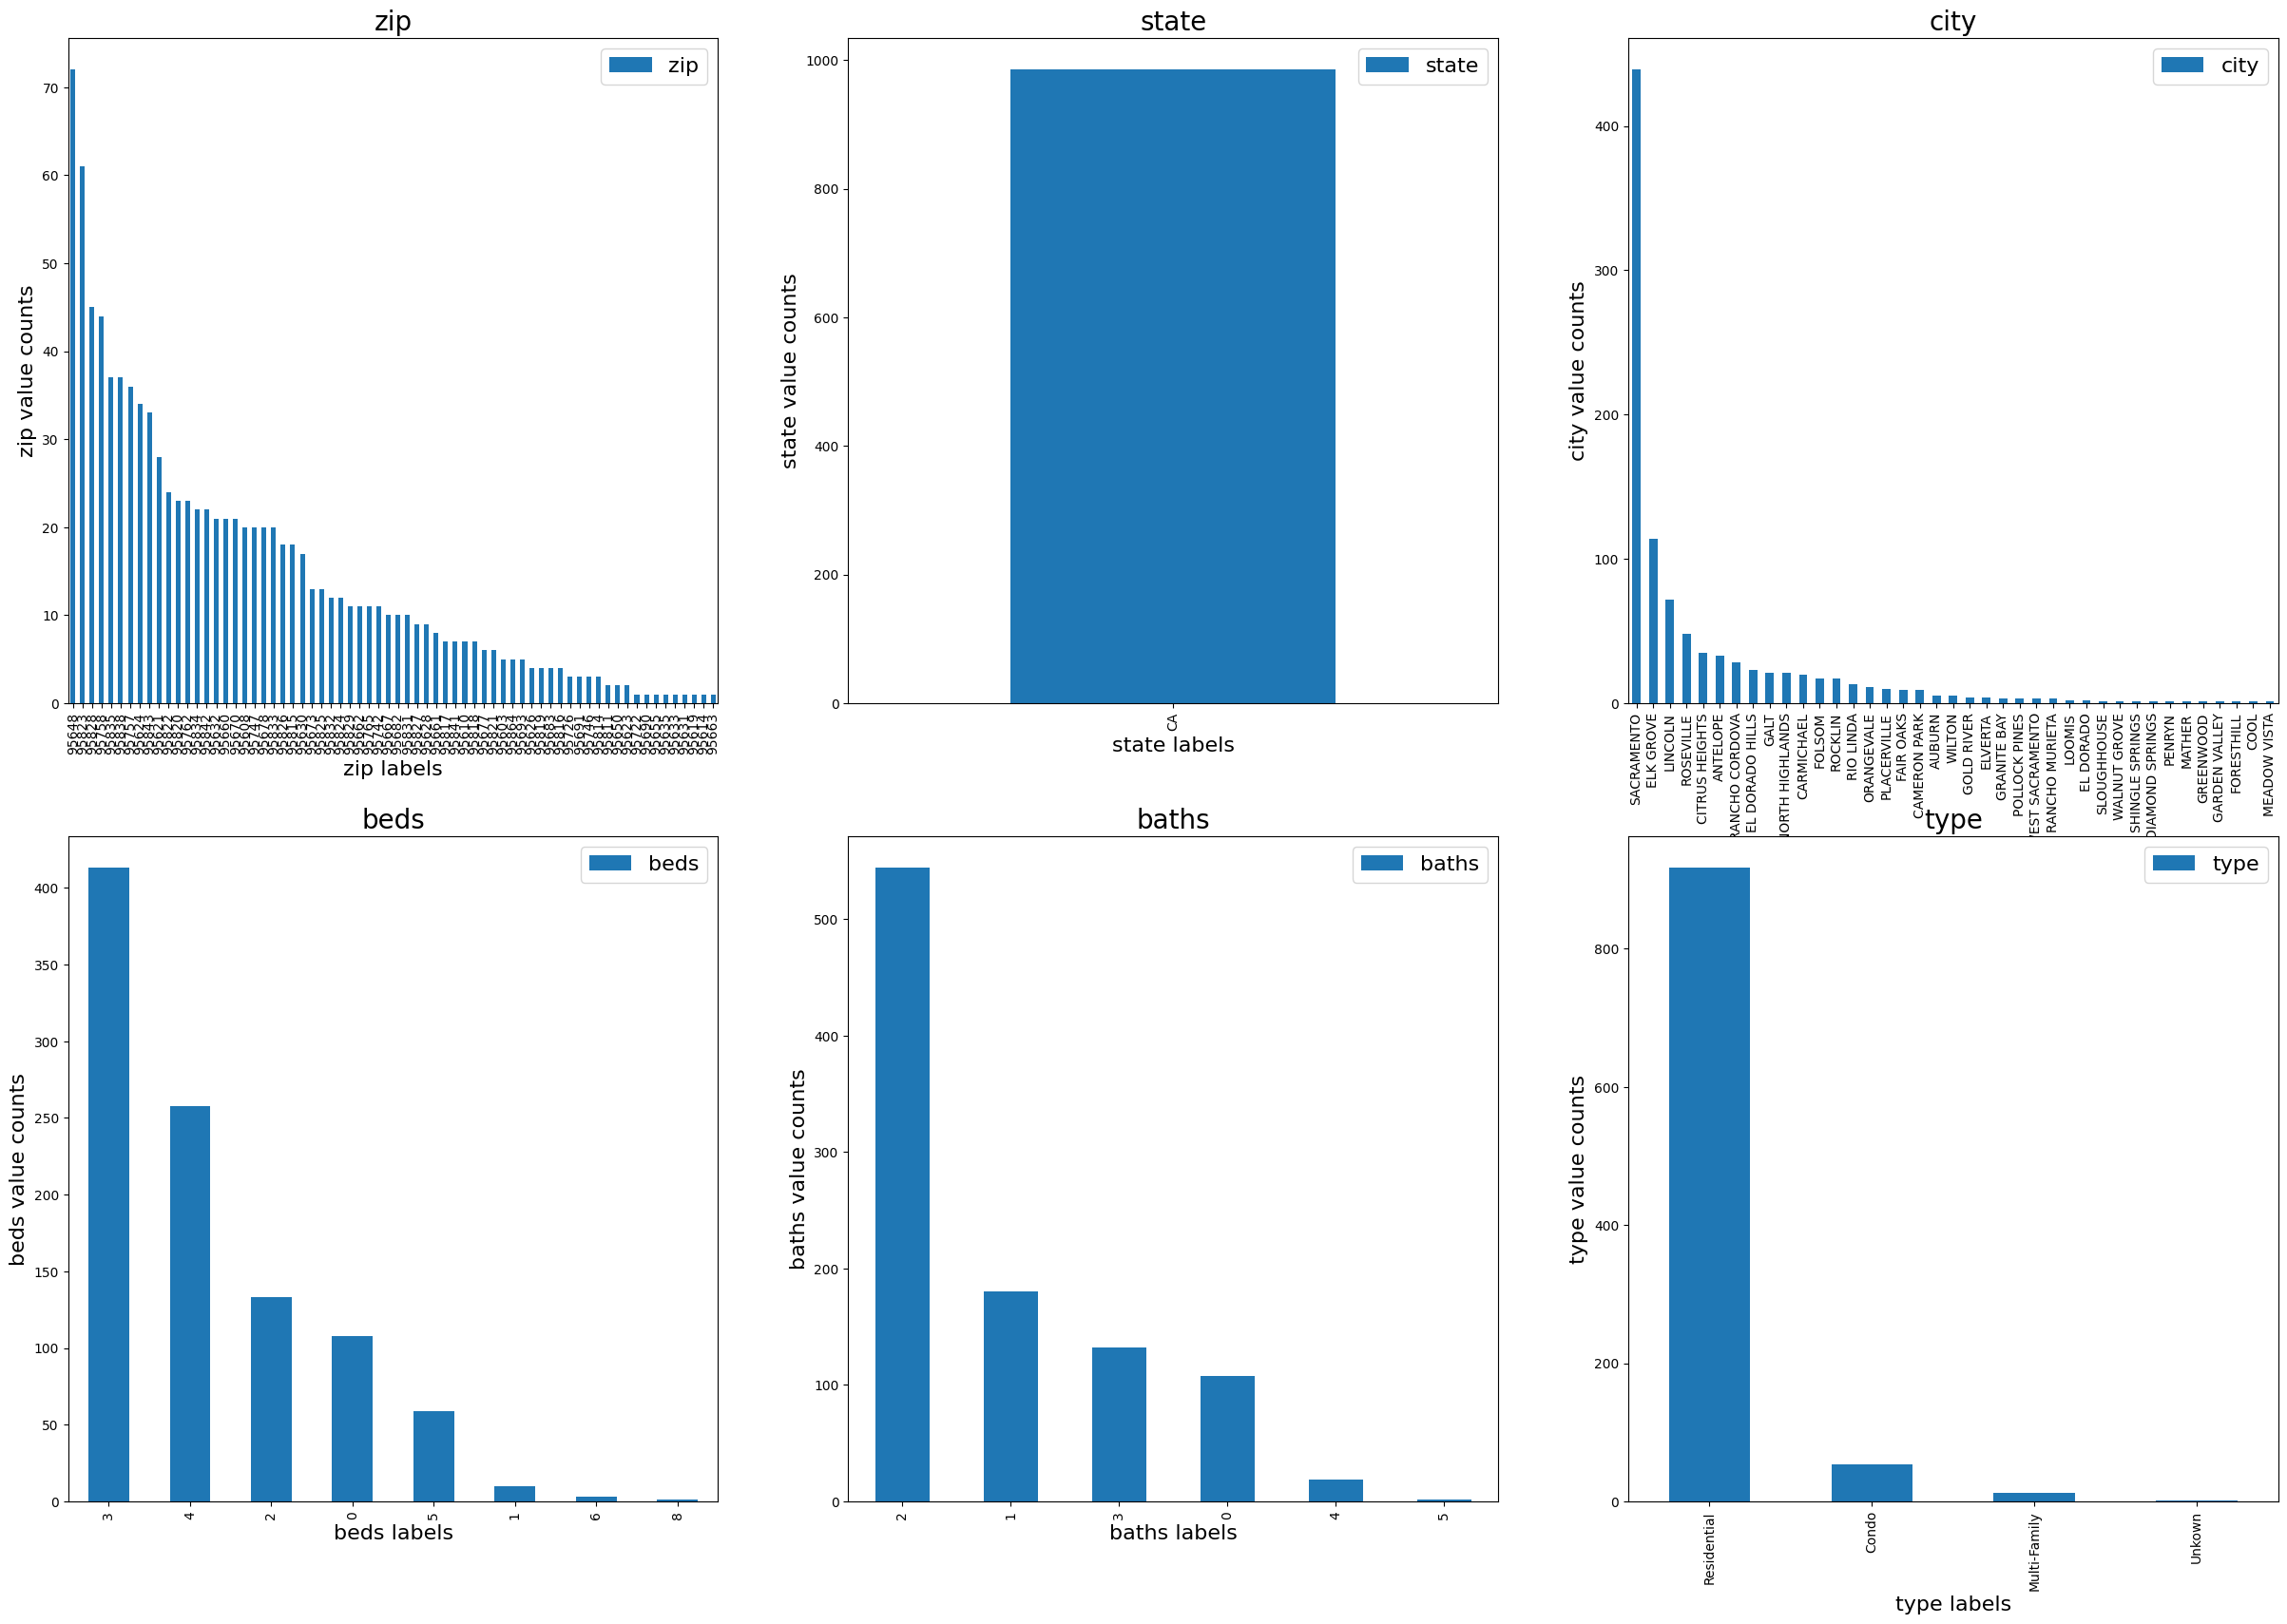

In [99]:
def make_bar(ax, col, df):
    vc = df[col].value_counts()
    
    ax = vc.plot(kind='bar', ax=ax)
    make_pretty(ax, col, f'{col} labels', f'{col} value counts')
    return ax

fig, ax = plt.subplots(figsize=(30, 20),nrows=2, ncols=3)
make_bar(ax[0,0], 'zip', sacramento_df)
make_bar(ax[0,1], 'state', sacramento_df)
make_bar(ax[0,2], 'city', sacramento_df)
make_bar(ax[1,0], 'beds', sacramento_df)
make_bar(ax[1,1], 'baths', sacramento_df)
make_bar(ax[1,2], 'type', sacramento_df)


Questions: 
• Do you notice any “odd” patterns in any of the plots? Do you think they real or 
artifacts?

Most of the data is spread around one central point and the others all roughly summize to the largest column. The data seems to follow the right half of a normal distribution. Seems to follow somewhat of a normal distribution.

## 5. Engineering new variables - Part 1

- create a new boolean variable called empty_lot  
- Add feature to dataframe
- create a bar chart of it


In [100]:
def empty_lot(x):
    if x == 0:
        return True
    else:
        return False
    
    
sacramento_df['empty_lot'] = sacramento_df['sq__ft'].map(empty_lot)

In [101]:
sacramento_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False


False    814
True     171
Name: empty_lot, dtype: int64


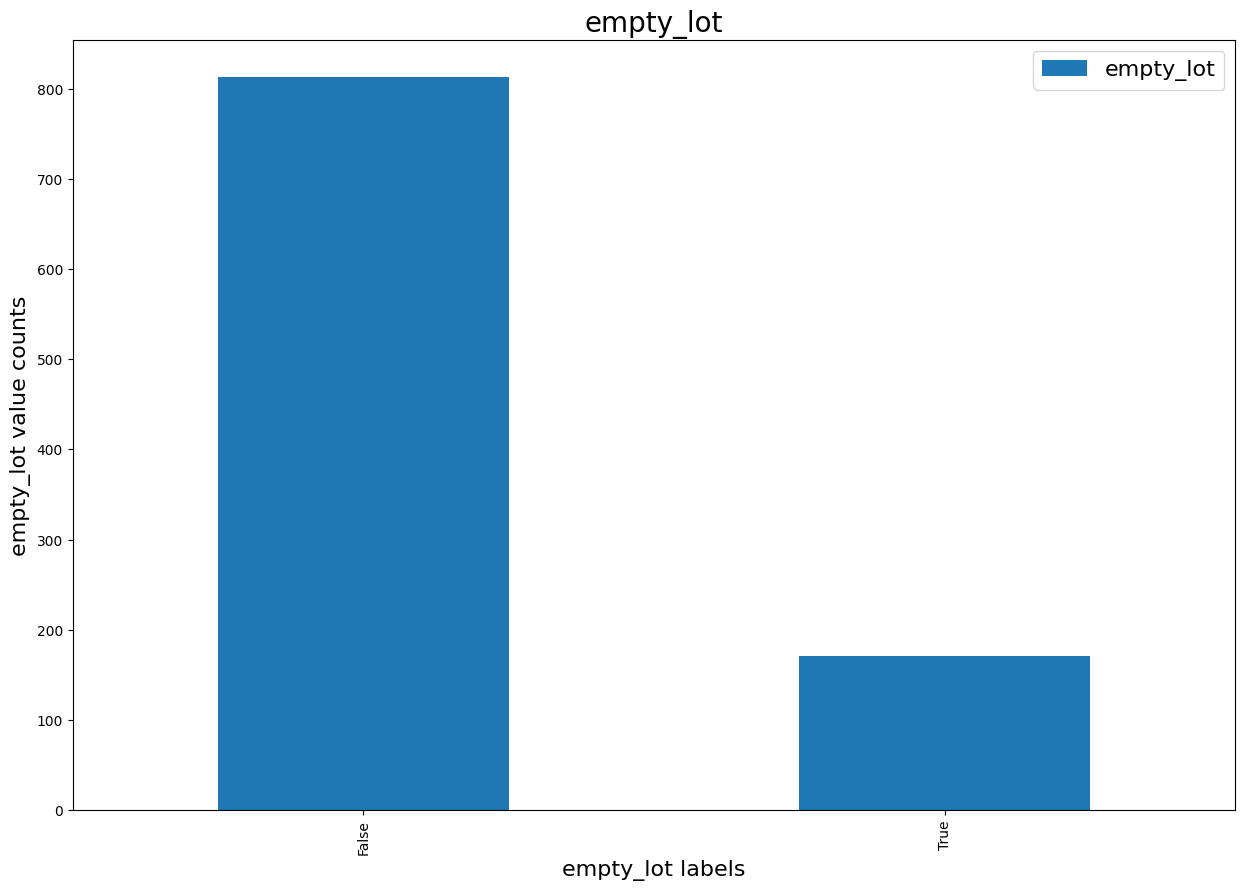

In [102]:
fig, ax = plt.subplots(figsize=(15, 10))

make_bar(ax, 'empty_lot', sacramento_df)

print(sacramento_df['empty_lot'].value_counts())

171 lots are empty lots

## 6. Engineering new Variables - Part 2

- Count the numer of unique values for the addresses (streets variable)
Question: 
- Do you think this variable is useful for analysis or as a feature for a ML model in its current form?  

I don't think that this variable is very useful for analysis or as a feature for a ML model in its current form. Since there are almost as many unique values as there are records, there is almost no commonality amongst the street column. However this is because numbers are tracked as well. If the house number was not tracked it may have more commonalities and could yield more interesting analysis. The same thing occurs if we look at the street type (avenue, street, way). A street address is a very low level (specific) way of looking at a location on earth. Cities for example give a slight abstraction as to where you live. You may know about the weather there, the language they speak and common food there, but you would not know more detailed information about the area.      


Preprocessing data like this, giving the model higher level abstractions, helps the model make better insights.  




In [103]:

# can't interpolate strings inside strings
s = 'street'
print(f'There are {len(sacramento_df[s].unique())} unique streets')


There are 981 unique streets


b. Street types (e.g., avenue, street, way) can indicate whether a road will be quiet or 
busy, is in a commercial or suburban area, etc.  The street types can be extracted from 
the address. Using the head() command, look at the first 20 records to identify address 
patterns. 


In [104]:
sacramento_df['street'].head(50)

0                        3526 HIGH ST
1                         51 OMAHA CT
2                      2796 BRANCH ST
3                    2805 JANETTE WAY
4                     6001 MCMAHON DR
5                  5828 PEPPERMILL CT
6                 6048 OGDEN NASH WAY
7                       2561 19TH AVE
8     11150 TRINITY RIVER DR Unit 114
9                        7325 10TH ST
10                   645 MORRISON AVE
11                      4085 FAWN CIR
12                    2930 LA ROSA RD
13                      2113 KIRK WAY
14                4533 LOCH HAVEN WAY
15                     7340 HAMDEN PL
16                        6715 6TH ST
17            6236 LONGFORD DR Unit 1
18                    250 PERALTA AVE
19                    113 LEEWILL AVE
20                 6118 STONEHAND AVE
21                  4882 BANDALIN WAY
22                    7511 OAKVALE CT
23                       9 PASTURE CT
24                 3729 BAINBRIDGE DR
25                 3828 BLACKFOOT WAY
26          

Each address has a street type. The unique values are:   
ST, CT, WAY, DR, AVE, CIR, LN, PKWY, BLVD, PL, RD, TRL, LOOP or HL      


(Collected from various websites for street names, there could be more)


c. Write a function get_street_type(address) that will return the street type (as a String) 
of an address.    

d. Use that function to create a new categorical variable of street types.  Count the 
unique elements and print them out.  If it looks like any addresses were parsed 
incorrectly (e.g., a number is returned instead of a street type), update your function in 
part c.  Repeat until you parse everything correctly.    
 


e. Add this feature to the dataframe. 

In [105]:

def get_street_type(x):
    if ' ST' in x:
        return 'ST'
    elif ' CT' in x:
        return 'CT'
    elif ' DR' in x:
        return 'DR'
    elif ' WAY' in x:
        return 'WAY'
    elif ' AVE' in x:
        return 'AVE'
    elif ' CIR' in x:
        return 'CIR'
    elif ' LN' in x:
        return 'LN'
    elif ' PKWY' in x:
        return 'PKWY'
    elif ' BLVD' in x:
        return 'BLVD'
    elif ' PL' in x:
        return 'PL'
    elif ' RD' in x:
        return 'RD'
    elif ' TRL' in x:
        return 'TRL'
    else:
        return None
    
    
sacramento_df['street_type'] = sacramento_df['street'].map(get_street_type)

### Checking to see which indices were not parsed correctly and why

In [106]:
null_vals = sacramento_df['street_type'].isnull().values
null_idx = np.where(null_vals == True)
null_idx

(array([309, 326, 338, 374, 511, 686, 814, 865], dtype=int64),)

In [107]:
sacramento_df.iloc[[326]]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
326,2733 DANA LOOP,EL DORADO HILLS,95762,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,541000,38.628459,-121.055078,True,None


### Explanation as to why there are still some null values

309 idx Street address: 6306 CONEJO   
326 idx Street address: 2733 DANA LOOP    
338 idx Street address: 4030 BROWADWAY    
374 idx Street address: 4128 VIA GRANDE   
511 idx Street address: 1322 SUTTER WALK   
686 idx Street address: 5890 TT TRAK     
814 idx Street address: 281 SPYGlASS HL   
865 idx Street address: 3720 VISTA DE MADERA	

All of these addresses are outliers and I don't think that it makes sense to filter for these since they are one offs. We could consider dropping these rows or we could simply leave them alone. 


### f. Plot the street types as a count (bar) plot.

WAY     300
DR      166
CT      126
CIR     113
ST       98
AVE      73
LN       44
RD       28
BLVD     12
PL       10
PKWY      7
Name: street_type, dtype: int64

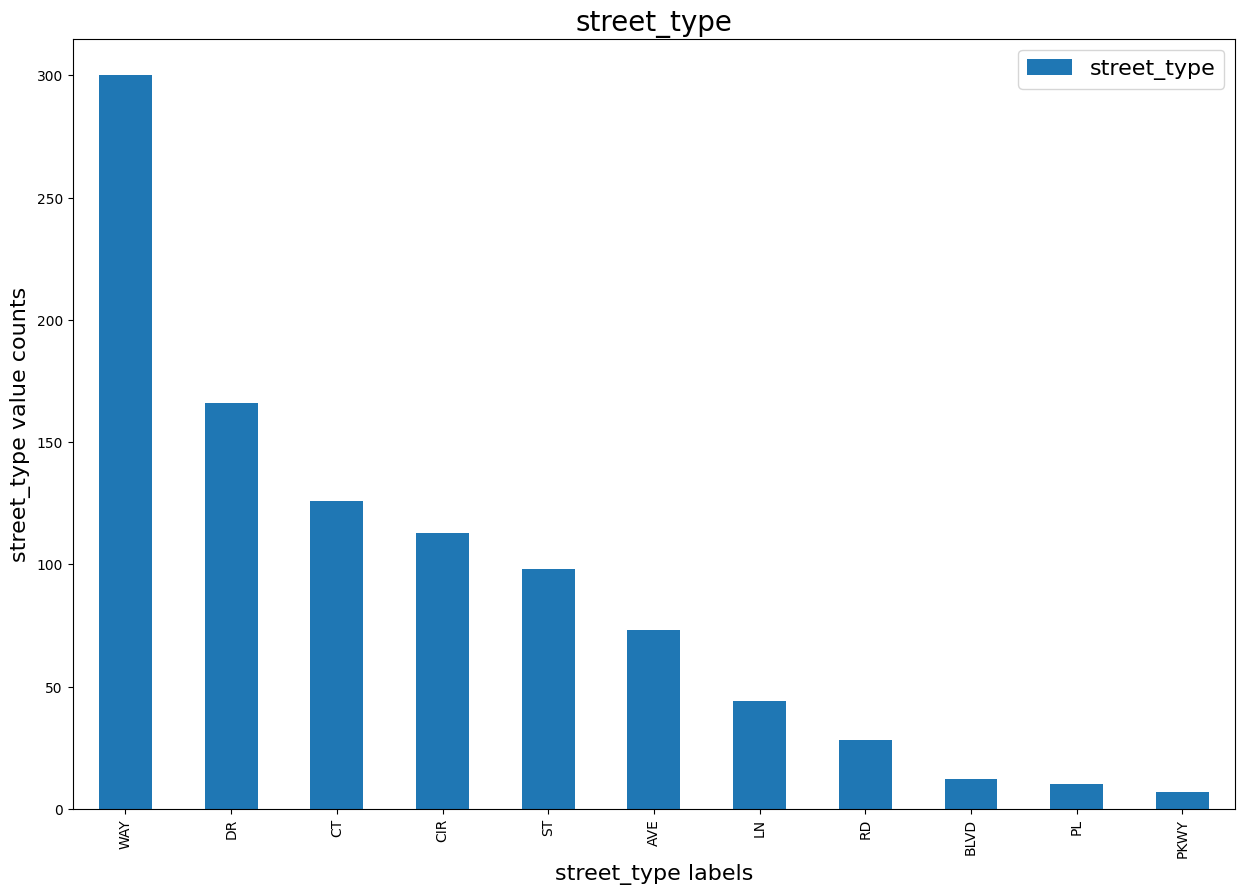

In [108]:
fig, ax = plt.subplots(figsize=(15, 10))


make_bar(ax, 'street_type', sacramento_df)

sacramento_df['street_type'].value_counts()

7. Identifying Potential Dependent Variables 
 
This data set can be used for both regression and classification problems. 
 


a.  Identify  a  variable  which  would  make  a  good  dependent  (output)  variable  for  a 
regression problem. 
- I believe the price column is a good column to use as the dependent variable for  regression problem.  
 
b.  Identify  a  variable  which  would  make  a  good  dependent  (output)  variable  for  a 
classification problem.   
- I believe that the city column is a good column to use as the dependent variable for a classification problem. Even though there are a lot of cities it would still make for an interesting classification problem. Is there any commonality between houses in the same city?   
 
Questions: 
• What types of variables are appropriate for regression?   
Regression predicts values that are continuous. (price, time, age)   
• What types of variables are appropriate for classification?
Classification predicts values that are discrete (categories, True or False, Cat, Dog or Horse, etc)

## 8. Identify and remove 2 outlier records from the dataset.    

There are at least two data points where some information is “unknown”. Identify which 
data points these are and remove them from your dataframe.

Since strings need different processing then numerical types I split the dataframe into two.

In [109]:
num_vars = sacramento_df.columns[sacramento_df.dtypes != 'object']
cat_vars = sacramento_df.columns[sacramento_df.dtypes == 'object']



In [110]:
sacramento_df[num_vars].isnull().sum()


city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
price        0
latitude     0
longitude    0
empty_lot    0
dtype: int64

None of the number variables are null

In [111]:
sacramento_df[cat_vars].isnull().sum()

street         0
sale_date      0
street_type    8
dtype: int64

street_type has 8 null for those 8 outliers we had before when making the category. It did not make sense to give each their own category.

In [112]:
sacramento_df['type'].unique()

['Residential', 'Condo', 'Multi-Family', 'Unkown']
Categories (4, object): ['Condo', 'Multi-Family', 'Residential', 'Unkown']

In [113]:
# One of the values is listed as unkown
for col in cat_vars:
    print(col)
    ret = sacramento_df.loc[sacramento_df[col] == 'Unkown']
    if ret.shape[0] != 0:
        
        print(ret.head())
        
# So the problem value is in the type column in row 757
sacramento_df.drop(757, axis=0, inplace=True)

sacramento_df.loc[sacramento_df['type'] == 'Unkown']

street
sale_date
street_type


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type


street	city	zip	state	beds	baths	sq__ft	type	sale_date	price	latitude	longitude	empty_lot	street_type

## 9. Save the cleaned Data set

In [114]:
sacramento_df.to_csv(os.path.join('Data', 'cleaned_sac_data.csv'))

### Conclusion

This lab gives us a feel on data science. We made sure types were correct, created new features, removed outliers, cleaned categorical and continuous variables, etc. all things that are common in a data scientists life. 

### Appendix 

I tend to try out some different things down here. This does not need to be graded. It is more just for fun.

<AxesSubplot: title={'center': 'Mean / Min / Max Sale Price per zip code'}, xlabel='zip code', ylabel='sale price'>

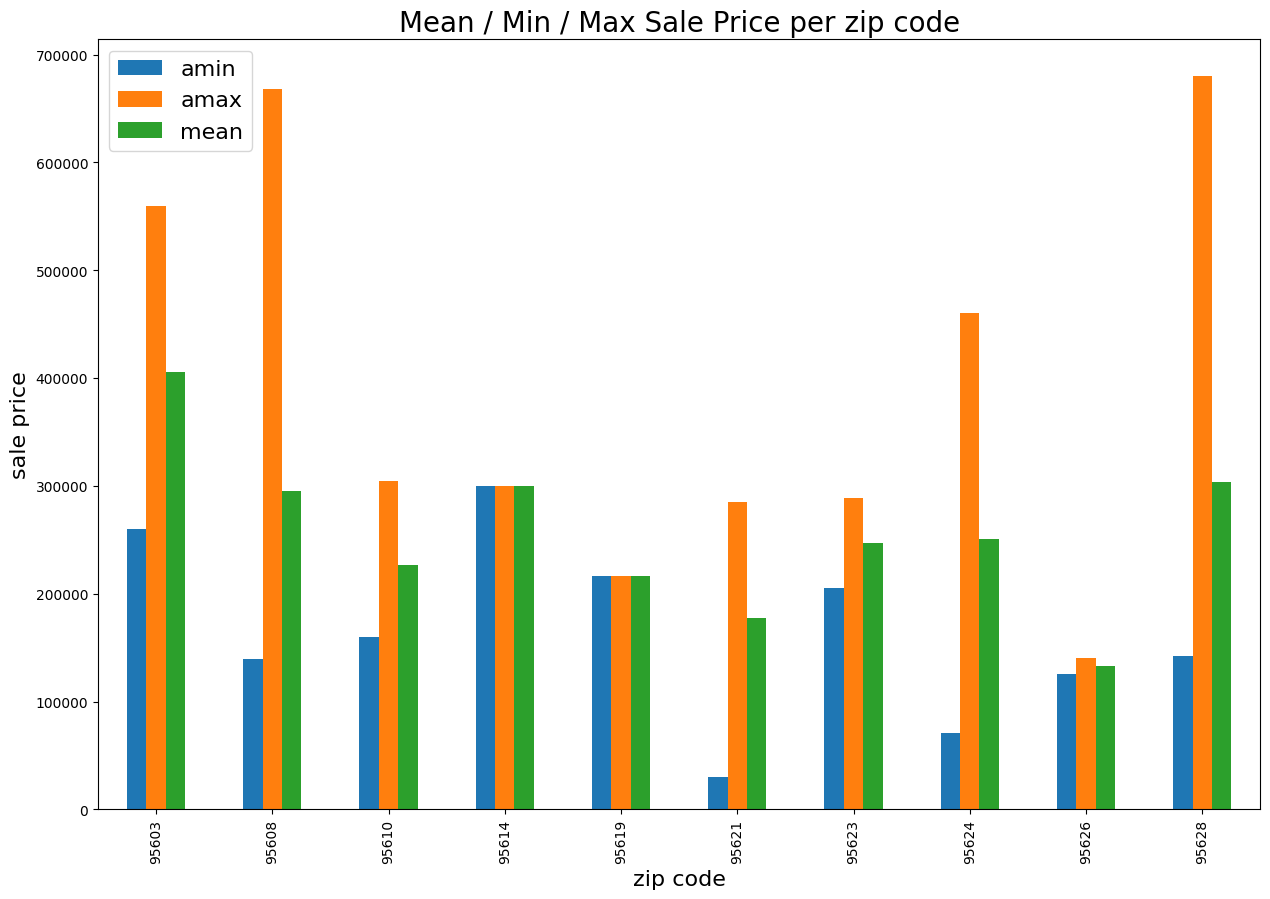

In [115]:
mean_min_max_zip = sacramento_df.groupby('zip')['price'].aggregate([np.min, np.max, np.mean])

fig, ax = plt.subplots(figsize=(15, 10))

mean_min_max_zip.iloc[0:10].plot(kind='bar', ax=ax)

make_pretty(ax, 'Mean / Min / Max Sale Price per zip code', 'zip code', 'sale price')


In [116]:
sacramento_df.corr()

C:\Users\paganinik\AppData\Local\Temp\ipykernel_9832\977473351.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sacramento_df.corr()


,sq__ft,price,latitude,longitude,empty_lot
sq__ft,1.000000,0.334780,-0.383364,-0.173660,-0.705998
price,0.334780,1.000000,-0.039650,0.285146,0.073610
latitude,-0.383364,-0.039650,1.000000,0.389364,0.461209
longitude,-0.173660,0.285146,0.389364,1.000000,0.353837
empty_lot,-0.705998,0.073610,0.461209,0.353837,1.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


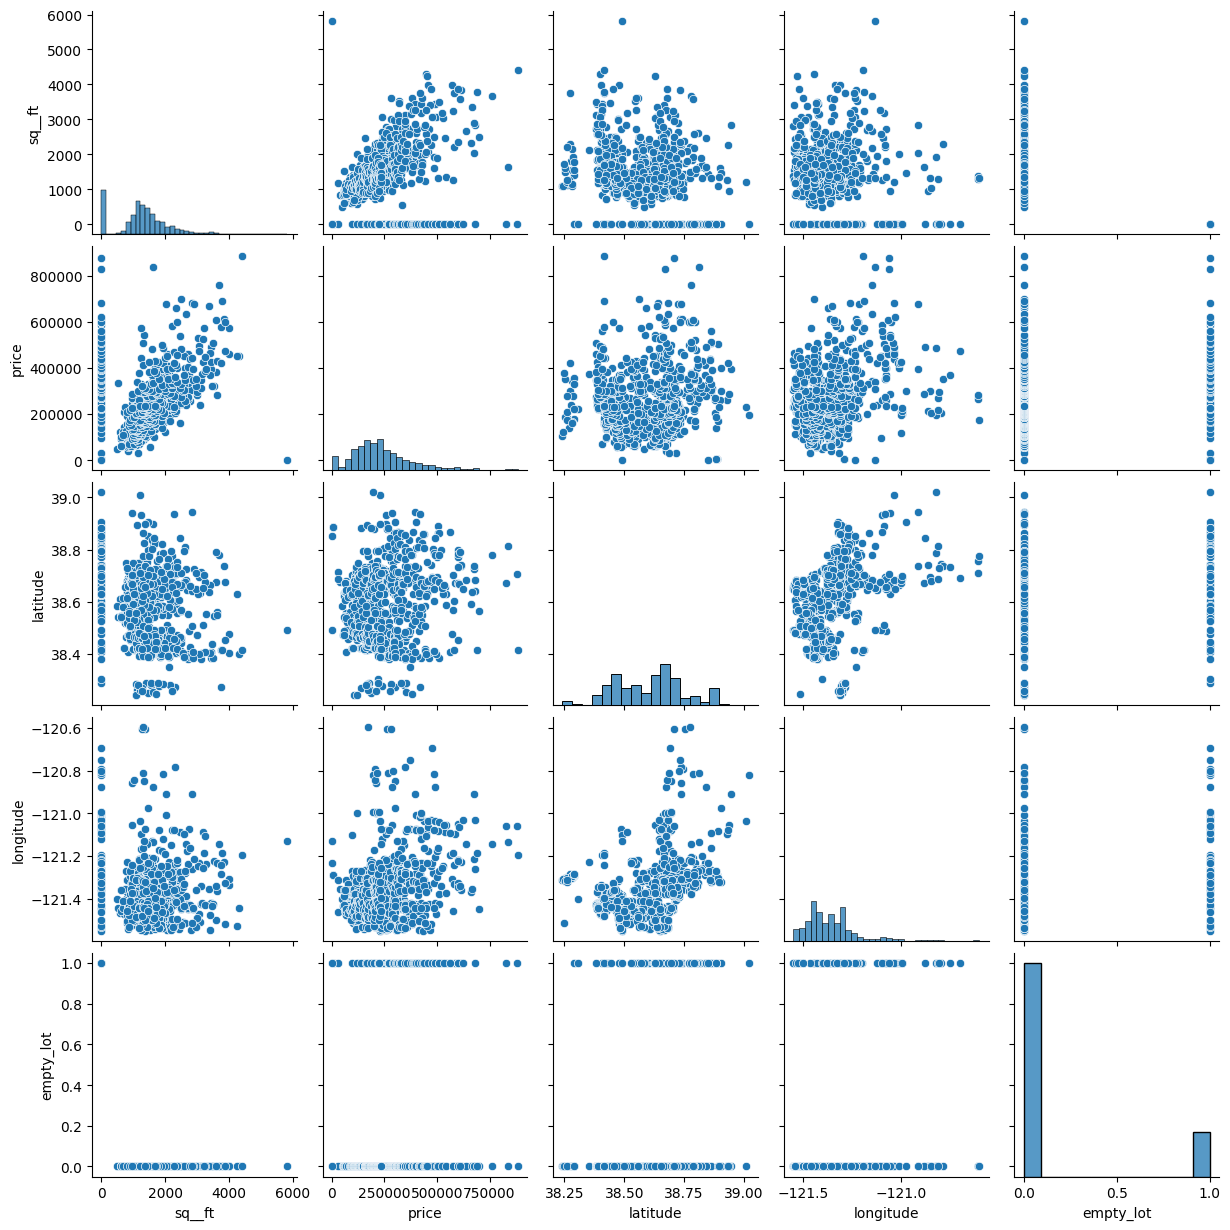

In [117]:
import seaborn as sns  

sns.pairplot(sacramento_df)

### Preprocess data

In [118]:

# from sklearn
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler





def encode_cat_data(col, df):
    uq_val = df[col].unique()
    map_dict = {}
    idx = 0
    for x in uq_val:
        map_dict[x] = idx
        idx += 1
    
    encoder= ce.OrdinalEncoder(cols=[col],return_df=True,
                            mapping=[{'col':col,'mapping':map_dict}])

    #Original data

    
    df = encoder.fit_transform(df)
    ret_map = {}
    for key in map_dict:
        ret_map[map_dict[key]] = key
    
    return df, ret_map

sacramento_df, city_map = encode_cat_data('city', sacramento_df)
sacramento_df, state_map = encode_cat_data('state', sacramento_df)
sacramento_df, zip_map = encode_cat_data('zip', sacramento_df)
sacramento_df, beds_map = encode_cat_data('beds', sacramento_df)
sacramento_df, baths_map = encode_cat_data('baths', sacramento_df)
sacramento_df, type_map = encode_cat_data('type', sacramento_df)
sacramento_df, street_type_map = encode_cat_data('street_type', sacramento_df)
sacramento_df, empty_lot_map = encode_cat_data('empty_lot', sacramento_df)
sacramento_df.drop(['street', 'sale_date'], inplace=True, axis=1)




In [119]:
X_cols = list(sacramento_df.columns)
X_cols.remove('price')

sac_X = sacramento_df[X_cols].values
sac_y = sacramento_df['price'].values


minmax = MinMaxScaler()
scaled_X = minmax.fit_transform(sac_X)
print(scaled_X)

[[0.         0.         0.         ... 0.12244459 0.         0.09090909]
 [0.         0.01492537 0.         ... 0.12648084 0.         0.18181818]
 [0.         0.02985075 0.         ... 0.11305359 0.         0.09090909]
 ...
 [0.08108108 0.68656716 0.         ... 0.30908653 0.         0.27272727]
 [0.16216216 0.26865672 0.         ... 0.16170128 0.         0.27272727]
 [0.40540541 0.50746269 0.         ... 0.49867572 0.         0.81818182]]


In [120]:
sacramento_df.head()

,city,zip,state,beds,baths,sq__ft,type,price,latitude,longitude,empty_lot,street_type
0,0,0,0,0,0,836,0,59222,38.631913,-121.434879,0,0.0
1,0,1,0,1,0,1167,0,68212,38.478902,-121.431028,0,1.0
2,0,2,0,0,0,796,0,68880,38.618305,-121.443839,0,0.0
3,0,2,0,0,0,852,0,69307,38.616835,-121.439146,0,2.0
4,0,3,0,0,0,797,0,81900,38.519470,-121.435768,0,3.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'pred vs. actual'}, xlabel='pred', ylabel='actual'>

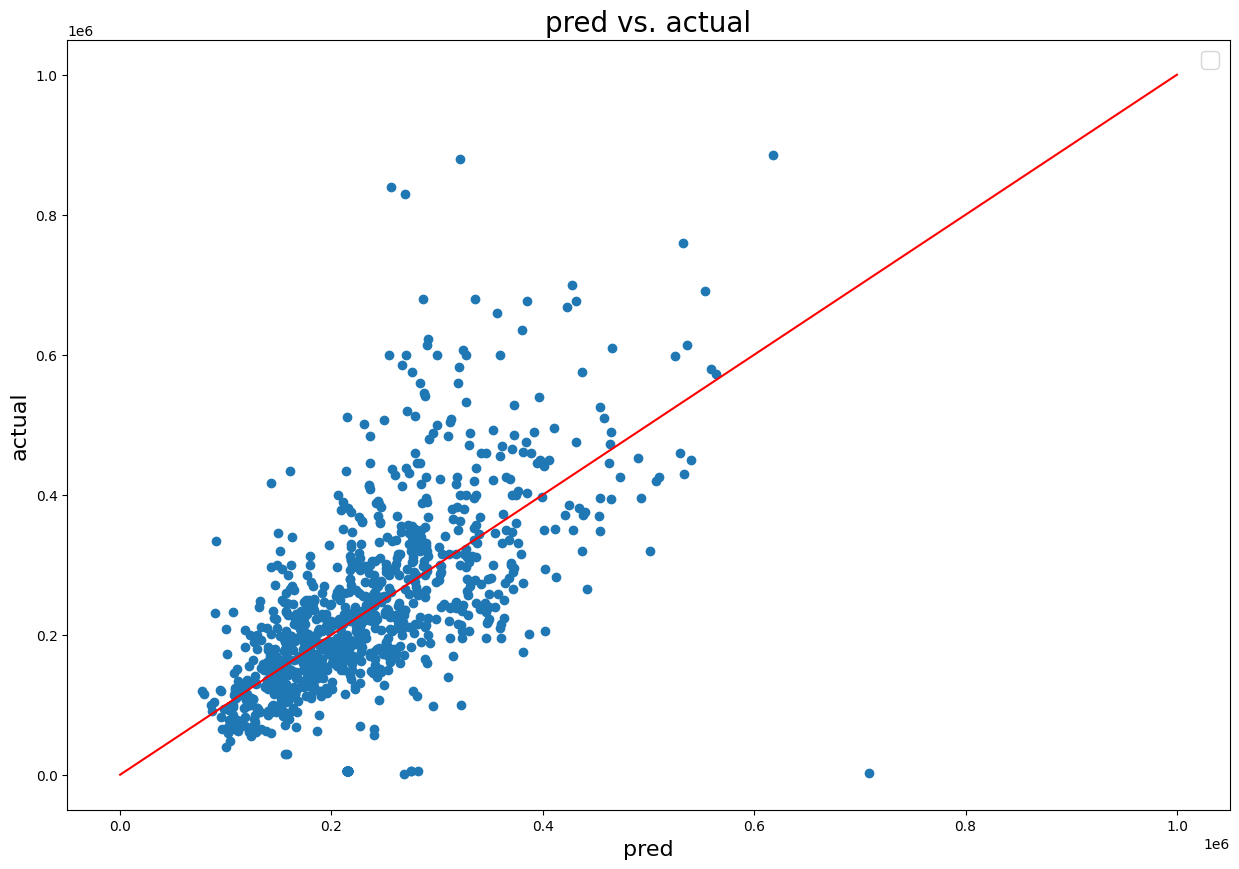

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()

linreg.fit(scaled_X, sac_y)

pred = linreg.predict(scaled_X)

fig, ax = plt.subplots(figsize=(15, 10))


xx = np.linspace(0,999999, 50)


ax.scatter(pred, sac_y)
ax.plot(xx, xx, color='red')
make_pretty(ax, 'pred vs. actual', 'pred', 'actual')







I mean for linear regression out of the box thats not that bad